In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv("data/olympics_08_medalists.csv") # Use the relative path of the CSV

#Preview dataset
print(df.head())

       medalist_name male_archery female_archery male_athletics  \
0    Aaron Armstrong          NaN            NaN           gold   
1      Aaron Peirsol          NaN            NaN            NaN   
2   Abdullo Tangriev          NaN            NaN            NaN   
3  Abeer Abdelrahman          NaN            NaN            NaN   
4            Abhinav          NaN            NaN            NaN   

  female_athletics male_badminton female_badminton male_baseball  \
0              NaN            NaN              NaN           NaN   
1              NaN            NaN              NaN           NaN   
2              NaN            NaN              NaN           NaN   
3              NaN            NaN              NaN           NaN   
4              NaN            NaN              NaN           NaN   

  male_basketball female_basketball  ... female_beach volleyball  \
0             NaN               NaN  ...                     NaN   
1             NaN               NaN  ...            

First, import the pandas library in Python and assign it the alias pd. In this step, I am loading a CSV file containing the Olympic medalist data from 2008 and previewing the first five rows of the dataset. The pd.read_csv() function reads the CSV file into a pandas DataFrame, which results in a DataFrame where the columns represent variables and the rows represent observations. The df.head() function outputs the first five rows of the DataFrame to provide a preivew of the structure and content of the data, which is necessary for understanding the initial organization of the data.

In [3]:
# Basic descriptive and statistics for each column
df.describe()

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
count,1875,11,9,85,81,12,10,72,35,36,...,6,36,36,39,39,24,21,28,16,27
unique,1875,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
top,Aaron Armstrong,bronze,bronze,silver,silver,silver,silver,silver,bronze,bronze,...,gold,bronze,gold,silver,gold,gold,bronze,bronze,bronze,bronze
freq,1,4,4,31,28,4,4,24,12,12,...,2,12,12,13,13,8,7,14,8,13


The df.describe() function in pandas generates a summary of descriptive statistics for numeric columns in the dataset. This function enables a quick overview of the data's distributions to help identify any potential issues or patterns. According to _Tidy Data_ by Hadley Wickham, tody data facilitates analysis. Running the df.describe() function aligns with the principle of exploring and summarizing tidy datasets as it illustrates that the data is untidy. Thus, the data must be tidied before it can be explored and summarized.

In [4]:
# Concise summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   medalist_name                 1875 non-null   object
 1   male_archery                  11 non-null     object
 2   female_archery                9 non-null      object
 3   male_athletics                85 non-null     object
 4   female_athletics              81 non-null     object
 5   male_badminton                12 non-null     object
 6   female_badminton              10 non-null     object
 7   male_baseball                 72 non-null     object
 8   male_basketball               35 non-null     object
 9   female_basketball             36 non-null     object
 10  male_boxing                   44 non-null     object
 11  male_canoeing and kayaking    53 non-null     object
 12  female_canoeing and kayaking  21 non-null     object
 13  male_road bicycle 

The df.info function in pandas provides a concise summary of the DataFrame by displaying the total number of rows and columns. Hadley Wickham outlines three principles of a tidy dataset:
    1. Each variable forms a column.
    2. Each observation forms a rown.
    3. Each type of observational unit forms a table.
Running df.info inspects whether the data aligns with tody principles, while also identifying missing values or inappropriate data types, which may require cleaning. In this case, the data is untidy as the princples of tidy data are not shown in this DataFrame. Thus, we must tidy the data.

In [5]:
# Make the columns into a list
list(df.columns)

['medalist_name',
 'male_archery',
 'female_archery',
 'male_athletics',
 'female_athletics',
 'male_badminton',
 'female_badminton',
 'male_baseball',
 'male_basketball',
 'female_basketball',
 'male_boxing',
 'male_canoeing and kayaking',
 'female_canoeing and kayaking',
 'male_road bicycle racing',
 'female_road bicycle racing',
 'male_track cycling',
 'female_track cycling',
 'male_mountain biking',
 'female_mountain biking',
 'male_bmx',
 'female_bmx',
 'male_diving',
 'female_diving',
 'female_equestrian sport',
 'male_equestrian sport',
 'male_fencing',
 'female_fencing',
 'male_field hockey',
 'female_field hockey',
 'male_association football',
 'female_association football',
 'male_artistic gymnastics',
 'female_artistic gymnastics',
 'female_rhythmic gymnastics',
 'male_trampoline gymnastics',
 'female_trampoline gymnastics',
 'male_handball',
 'female_handball',
 'male_judo',
 'female_judo',
 'male_modern pentathlon',
 'female_modern pentathlon',
 'male_rowing',
 'female_ro

The list(df.columns) function retrieves all column headers from the DataFrame and converts them into a list to allow us to see all the variable names. Once we have the list of column names, we are able to identify which variables are present and use the list for more efficient data tidying. We know from the df.describe() function that there are over 70 variables that would take a long time to type into our code. Thus, by formatting them as a list, we organize the variables and make them more suitable for data tidying. The function ensures that all variables have been correctly structured as columns, aligning with the _Tidy Data_ framework.

In [6]:
# Melt the dataset
data_melted = df.melt(id_vars = "medalist_name",                    # Columns to keep intact
              value_vars = list(df.columns)[1:],                    # Columns converted into rows
              var_name = "event_gender",                            # New column name for the melted variable names
              value_name = "medal").dropna(subset = ["medal"])      # New column name for the values and remove rows where "medal" is NaN

# Preview melted dataset
print(data_melted.head())

      medalist_name  event_gender   medal
177    Bair Badënov  male_archery  bronze
676   Ilario Di Buò  male_archery  silver
682    Im Dong-hyun  male_archery    gold
760       Jiang Lin  male_archery  bronze
920  Lee Chang-hwan  male_archery    gold


This code restructures the dataset from a wide format to a long format, a key step in the _Tidy Data_ framework. This step is completed by the pd.melt() function. id_vars specifies that the medalist_name column should remain intact and not be melted. value_vars tells Pandas to melt all other columns, which represent the Olympic events. The [1:] command ensures that medalist_name is not melted as part of the columns list because it is its own variable and must have its own column. On the other hand, value_vars converts the column headers into rows. var_name creates a new column named "event_gender" to store these melted column names. value_name creates a new column named "medal" to hold the values "gold," "silver," or "bronze." Additionaly, .dropna(subset = ["medal"]) removes rows where the value in the "medal" column is NaN. After melting the data, the .head() function previews the first five rows of the melted dataset, showing that each variable forms its own column and each observation forms a row, addressing two of the three princples of _Tidy Data_.

In [7]:
# Use str.split to create two new columns: "gender" and "event"
data_melted[["gender", "event"]] = data_melted["event_gender"].str.split("_", expand = True)

# Drop the "event_gender" column
data_melted = data_melted.drop(columns = ["event_gender"])

# Preview transformed dataset
print(data_melted.head())

      medalist_name   medal gender    event
177    Bair Badënov  bronze   male  archery
676   Ilario Di Buò  silver   male  archery
682    Im Dong-hyun    gold   male  archery
760       Jiang Lin  bronze   male  archery
920  Lee Chang-hwan    gold   male  archery


This step transforms the melted dataset by splitting the "event_gender" column into two seperate columns: "gender" and "event" to better align. The str.split function splits the values in the "event_gender" column into two parts, using the "_" as the separator and "expand = True" ensures that the split creates two new columns. This results in two new columns: "gender" with observations "male" or "female" and "event" with observations representing the olympic event. These new columns are assigned by the data_melted[["gender", "event"]] function. The data_melted.drop(columns = ["event_gender"]) function removes the "event_gender" column, since its information is now split into the two new columns and is no longer necessary. The .head() function previews the first five rowns of the updated DataFrame to verify the transformation. Overall, this step further ensures that each variable forms its own column and that each form of observational unit forms its own table. 

In [8]:
# Clean the "event" column using str.replace() to remove unwanted words
data_melted["event"] = (
    data_melted["event"]
    .str.replace(" sport", "", regex = False)      # Remove "sport"
    .str.replace("and", "&", regex = False)        # Replace "and" with "&"
    .str.strip())                                  # Remove unneeded spaces

# Preview the cleaned dataset
print(data_melted.head())

      medalist_name   medal gender    event
177    Bair Badënov  bronze   male  archery
676   Ilario Di Buò  silver   male  archery
682    Im Dong-hyun    gold   male  archery
760       Jiang Lin  bronze   male  archery
920  Lee Chang-hwan    gold   male  archery


This code cleans the "event" column to remove unwanted information that is unnecessary or inconsistent. str.replace(" sport", "", regex = False) removes the word "sport" from any string in the "event" column. For example. "equestrian sport" becomes "equestrian." str.replace("and", "&", regex = False) replaces the word "and" with "&" in the "event" column. For example, "canoeing and kayaking" becomes "canoeing & kayaking." Finally, str.strip() cleans spaces to ensure clean formatting of the DataFrame. Overall, the cleaned strings are assigned back to the "event" column and the .head() function verifies that the cleaning was successful as the column values are concise and consistent, aligning with the _Tidy Data_ frameowkr that standardized variables improve readability and help to facilitate analysis and visualization.

gender
male      1032
female     843
Name: count, dtype: int64


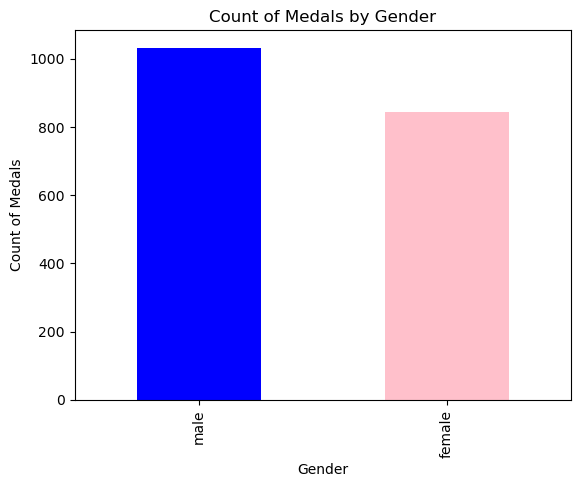

In [9]:
# Count of medals by gender
medals_by_gender = data_melted["gender"].value_counts()
print(medals_by_gender)

# Plot 1: Bar Chart - Medals by Gender
medals_by_gender.plot(kind = "bar", color = ["blue", "pink"])
plt.title("Count of Medals by Gender")
plt.xlabel("Gender")
plt.ylabel("Count of Medals")
plt.show()

First, import the pyplot functions in the matplotlib package and assign them as plt. This step in the code generates a bar chart to visualize the count of medals by gender from the cleaned dataset. The data_melted["gender"].value_counts() function counts the occurences of each unique value in the "gender" column. This means that 1032 males won medals and 843 females won medals. By printing these reults, it provides the numerical summary of the data before plotting. The medals_by_gender.plot(kind = "bar", color = ["blue", "pink"]) function specifies that the visualization is going to be a bar chart and assigns blue for one gender and pink for the other on the chart. The title, xlabel, and ylabel functions add titles and labels to the chart, as well as the x and y-axis. Finally, the chart is displayed by the plt.show() function. This visualization benefits from the tidy data structure becuase it make it easy to group and count the data. Thus, analysis is more easily rendered from the visualizations that clearly represent the data. 

gender                 female  male
event                              
archery                   9.0  11.0
artistic gymnastics      20.0  29.0
association football     54.0  55.0
athletics                81.0  85.0
badminton                10.0  12.0
baseball                  NaN  72.0
basketball               36.0  35.0
beach volleyball          6.0   6.0
bmx                       3.0   3.0
boxing                    NaN  44.0
canoeing & kayaking      21.0  53.0
diving                   13.0  16.0
equestrian               20.0  18.0
fencing                  26.0  28.0
field hockey             48.0  50.0
freestyle wrestling      16.0  28.0
greco-roman wrestling     NaN  27.0
h&ball                   42.0  43.0
judo                     28.0  28.0
modern pentathlon         2.0   3.0
mountain biking           3.0   3.0
rhythmic gymnastics      21.0   NaN
road bicycle racing       6.0   5.0
rowing                   58.0  83.0
sailing                  21.0  33.0
shooting                 17.

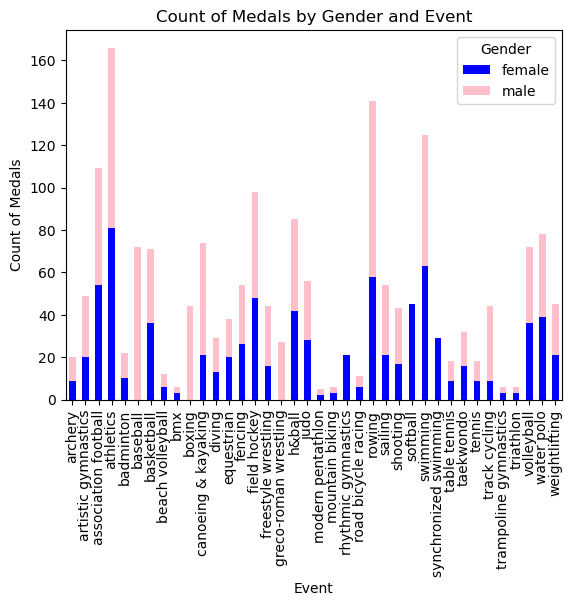

In [10]:
# Count of medals by gender and event
medals_by_event_gender = data_melted.groupby(["event", "gender"])["medal"].count().unstack()
print(medals_by_event_gender)

# Plot 2: Stacked Bar Chart - Medals by Gender and Event
medals_by_event_gender.plot(kind = "bar", stacked = True, color = ["blue", "pink"])
plt.title("Count of Medals by Gender and Event")
plt.xlabel("Event")
plt.ylabel("Count of Medals")
plt.legend(title = "Gender")
plt.show()

This code builds upon the previous visualization by calculating the count of medals by event and gender and visualizing it in a stacked bar chart. The data_melted.groupby(["event", "gender"])["medal"].count() groups the data by both event and gender and counts the number of medals for each group. .unstack() transforms the grouped result so that gender becomes columns, like a pivot table, which spreads rows into columns according to the Pandas Cheat Sheet. To plot the stacked bar chart, we start by inputting the data and telling Python we want a bar chart that is stacked using medals_by_event_gender.plot(kind="bar", stacked=True). Then, we again assign the colors for each gender with color=["blue", "pink"] and the labels and title of the chart and x and y-axis with plt.title(), plt.xlabel(), and plt.ylabel(). Additionally, in this visualization, plt.legend(title = "Gender") adds a legend to distinguish between genders. Finally, plt.show() displays the visualization. Each bar in the visualization represents an event, with stacked segments that indicate the count of medals won by each gender, which reveals the distribution of medals for both genders across the events. For example, illustrating that 20 medals were won by females in artistic gymanstics and 29 were won by men.

gender                 female  male
event                              
archery                     9    11
artistic gymnastics        20    29
association football       54    55
athletics                  81    85
badminton                  10    12
baseball                    0    72
basketball                 36    35
beach volleyball            6     6
bmx                         3     3
boxing                      0    44
canoeing & kayaking        21    53
diving                     13    16
equestrian                 20    18
fencing                    26    28
field hockey               48    50
freestyle wrestling        16    28
greco-roman wrestling       0    27
h&ball                     42    43
judo                       28    28
modern pentathlon           2     3
mountain biking             3     3
rhythmic gymnastics        21     0
road bicycle racing         6     5
rowing                     58    83
sailing                    21    33
shooting                   1

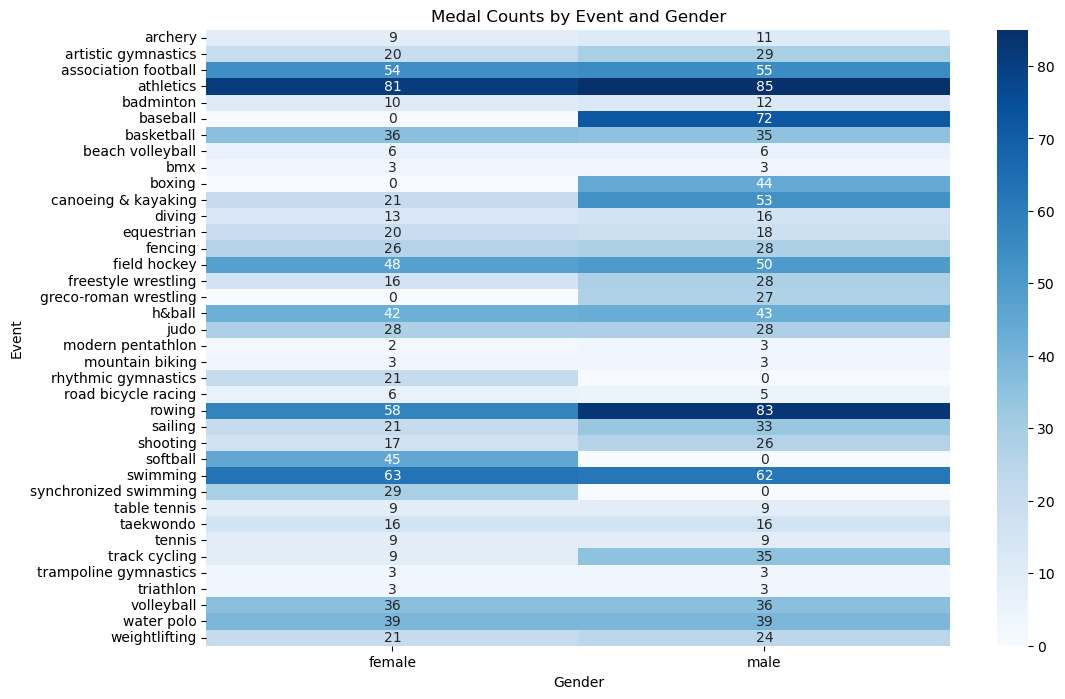

In [11]:
# Create pivot table to summarize medal counts by gender and event
pivot_table = data_melted.pivot_table(
    index = "event",        # Column to aggregate
    columns = "gender",     # Rows: Event categories
    values = "medal",       # Columns: Gender categories
    aggfunc = "count",      # Aggregation function: Count medals
    fill_value = 0)         # Replace missing values with 0
print(pivot_table)

# Plot 3: Heatmap - Medal Distributions by Gender and Event
plt.figure(figsize = (12, 8))
sns.heatmap(pivot_table, annot = True, fmt = "d", cmap= "Blues")
plt.title("Medal Counts by Event and Gender")
plt.xlabel("Gender")
plt.ylabel("Event")
plt.show()

First import the Seaborn visualization library and assign it as sns. This snippet creates a heatmap to visualize the medal counts by gender and event based on a pivot table. First, we need to create the pivot table by using data_melted.pivot_table(), which groups and aggregates the data by event in the rowns and gender in the columns. values = "medal" specifies to aggregate the "medal" column. aggfunc = "count" counts the number of medals for each combination of "event" and "gender." fill_value = 0 replaces any missing values with 0 to ensure thr grid is complete with events and genders. This results in a table where cell represents the count of medals for a specific gender in an event. We can then visualize this with a heatmap using the code sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Blues"). annot = True puts the numerical value in each cell and fmt = "d" formats the values as integers. cmap = "Blues" uses a blue color pallete to represent the concentration of medal counts. plt.figure(figsize=(12, 8)) sets the size of the heatmap so it is clear and plt.title, plt.xlabel, plt.ylabel add a title and labels to the x and y axis. Finally, plt.show() displays the heatmap. In the heatmap, rows represent events, columsn represent genders, and cell colors show the concentration of the mdeal counts. Darker shades of blue indicate higher medal counts, while lighter shades represent fewer models. Overall, this visualization highlights patterns in medal distributions across events and genders. 